## California Housing (Ensemble Learning)


### About Dataset
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows, their names are pretty self explanitor.

### Table of Content
* **Exploratory Data Analysis (EDA)**

    - Correlation (Heatmap)
    - Geospatial Data Visualization  



* **Classification & Regression**
    - Logistic Regression
    - Decision Tree


* **Machine Learning Modeling (Ensemble Learning)**
    - Adaboost
    - Random Forest
    - Gradiant Boosting
    

### Understainding Data

In [279]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
sns.set()

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# grid search for model selection
from sklearn.model_selection import GridSearchCV

# linear regression
from sklearn.linear_model import LinearRegression

# logistic regression
from sklearn.linear_model import LogisticRegression

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

warnings.simplefilter(action='ignore', category= FutureWarning)

## Exploratory Data Analysis (EDA)

### Load and visualize the data

In [280]:
# load data 
# Load train and test data from CSV files.
cal = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/housing_train.csv')
display(cal)
cal.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.79,36.73,52.0,112.0,28.000000,193.0,40.0,1.9750,47500.0
1,-122.21,37.77,43.0,1017.0,328.000000,836.0,277.0,2.2604,100000.0
2,-118.04,33.87,17.0,2358.0,396.000000,1387.0,364.0,6.2990,285800.0
3,-118.28,34.06,17.0,2518.0,1196.000000,3051.0,1000.0,1.7199,175000.0
4,-119.81,36.73,50.0,772.0,194.000000,606.0,167.0,2.2206,59200.0
5,-117.79,33.80,11.0,10535.0,1620.000000,4409.0,1622.0,6.6700,283200.0
6,-117.80,33.81,14.0,1206.0,142.000000,572.0,149.0,8.8470,388700.0
7,-121.26,38.69,17.0,3917.0,638.000000,1809.0,564.0,5.2586,137000.0
8,-117.65,33.48,6.0,1638.0,188.000000,572.0,174.0,13.0502,500001.0
9,-122.27,37.97,10.0,15259.0,2275.000000,7266.0,2338.0,6.0666,272400.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.257009,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,421.564382,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,438.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


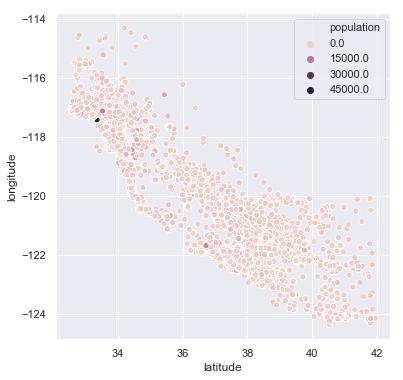

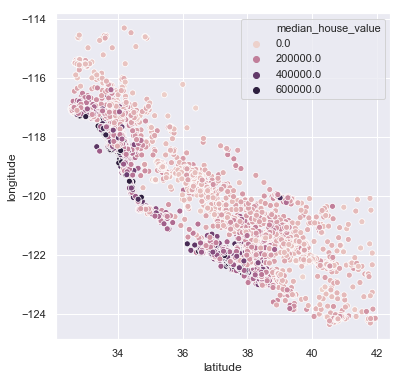

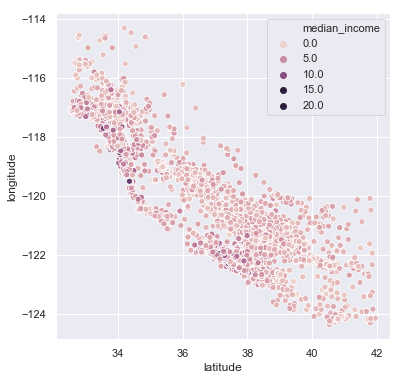

In [281]:
# visualize
import matplotlib 
import matplotlib.pyplot as plt

fig.suptitle('Population')
matplotlib.pyplot.figure(figsize=(6,6))
sns.scatterplot(x=cal["latitude"], y=cal["longitude"], hue=cal["population"])

fig.suptitle('House Value')
matplotlib.pyplot.figure(figsize=(6,6))
sns.scatterplot(x=cal["latitude"], y=cal["longitude"], hue=cal["median_house_value"])

fig.suptitle('Income')
matplotlib.pyplot.figure(figsize=(6,6))
sns.scatterplot(x=cal["latitude"], y=cal["longitude"], hue=cal["median_income"])


## Correlation 

In [282]:
cal_df = cal[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
              'population', 'households', 'median_income', 'median_house_value']]
cal_corr = cal_df.corr()
cal_corr.corr().style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.984312,-0.20976,0.16599,0.18717,0.225003,0.181533,0.0093621,-0.00524564
latitude,-0.984312,1,0.13744,-0.1257,-0.136825,-0.171953,-0.134462,-0.124185,-0.149255
housing_median_age,-0.20976,0.13744,1,-0.812469,-0.763121,-0.751544,-0.75808,-0.126918,0.10512
total_rooms,0.16599,-0.1257,-0.812469,1,0.98733,0.975928,0.987776,-0.0850258,-0.188628
total_bedrooms,0.18717,-0.136825,-0.763121,0.98733,1,0.989854,0.999324,-0.226038,-0.292889
population,0.225003,-0.171953,-0.751544,0.975928,0.989854,1,0.992049,-0.24377,-0.327329
households,0.181533,-0.134462,-0.75808,0.987776,0.999324,0.992049,1,-0.216001,-0.281839
median_income,0.0093621,-0.124185,-0.126918,-0.0850258,-0.226038,-0.24377,-0.216001,1,0.895085
median_house_value,-0.00524564,-0.149255,0.10512,-0.188628,-0.292889,-0.327329,-0.281839,0.895085,1


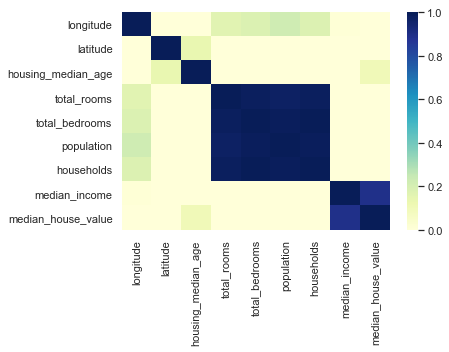

In [283]:
#Heatmap
import seaborn as sns
corr = cal_corr.corr()
sns.heatmap(corr, 
            vmin=0, vmax=1, # setting min and max probability
            center=0.5, # changing to peach for high correlation, blue for low
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="YlGnBu")

## Linear Regression

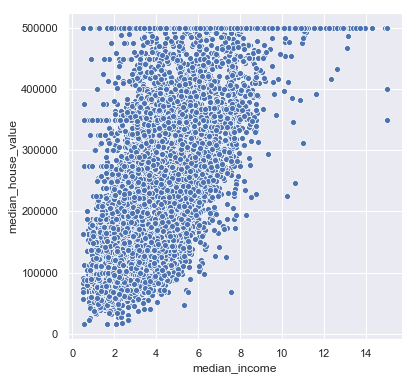

In [284]:
import matplotlib 
import matplotlib.pyplot as plt

matplotlib.pyplot.figure(figsize=(6,6))
sns.scatterplot(x=cal["median_income"], y=cal["median_house_value"])

**Train linear regression model**

Train a linear regression to "predict median_house_value" using "median_income", and print the coefficients of the linear model:

In [285]:
# Train linear regression model

# model initialization
linear_regression_model = LinearRegression()

# fit the data(train the model)
linear_regression_model.fit(cal.loc[:, ['median_income']], cal['median_house_value'])

# print values
print('Slope: {}'.format(linear_regression_model.coef_))
print('Intercept: {}'.format(linear_regression_model.intercept_))

Slope: [42291.41984316]
Intercept: 43297.76980148192


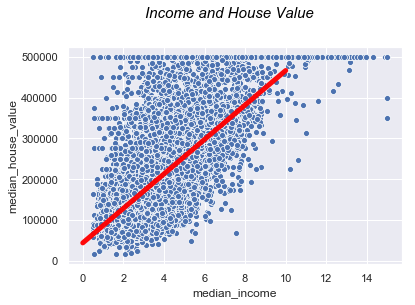

In [286]:
# visualize the linear model
plt.suptitle("Income and House Value", fontsize=15, fontweight=0, color='black', style='italic', y=1.02)

x_plot = np.linspace(0, 10, 1000)
y_plot = linear_regression_model.coef_[0] * x_plot + linear_regression_model.intercept_
sns.scatterplot(x=cal["median_income"], y=cal["median_house_value"], alpha=1)
sns.lineplot(x_plot, y_plot, color='red', linewidth=5, alpha=10)

### Predict with a linear regression model

Now we have a linear regression model trained. We would like to evaluate its performance and also use it to predict on new data points. Please refer to this API to make prediction with the model you just trained.

In [287]:
# predict
z = linear_regression_model.predict(cal.loc[:, ['median_income']])
y = cal['median_house_value']

### Model Evaluation

In [288]:
# Use scikit learn's implementation
mse = mean_squared_error(y, z)
r2 = r2_score(y, z)

print('mean squared error: {}'.format(mse))
print('R2 score: {}'.format(r2))

mean squared error: 6911954457.712014
R2 score: 0.48062719927664055


## Geospatial Data Visualization

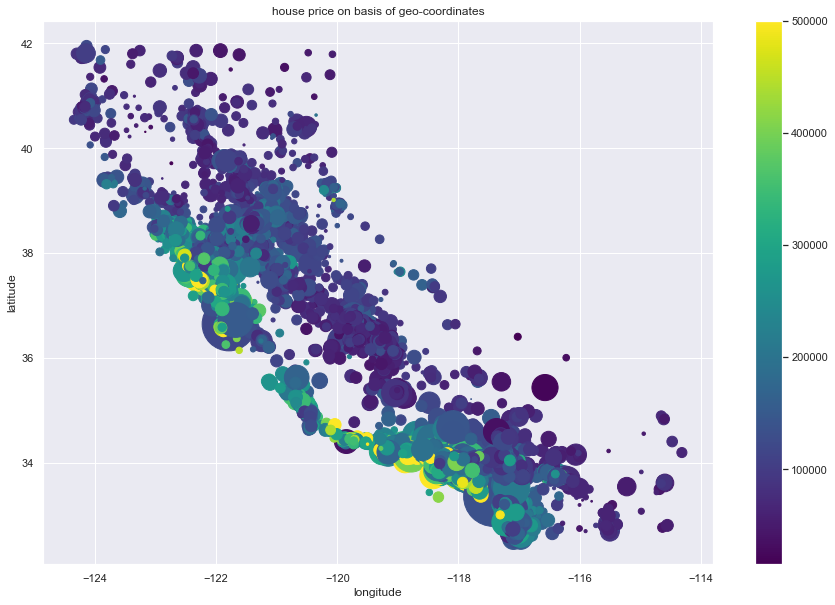

In [289]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
import  statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans

%matplotlib inline

plt.figure(figsize=(15,10))
plt.scatter(cal['longitude'],cal['latitude'],c=cal['median_house_value'],s=cal['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('house price on basis of geo-coordinates')
plt.show()